# Data Cleaning Intro #

The objective of this lab is to inspect and clean a data set of real estate transactions in California. To apply and interpret different visuals and statistical methods to analyze distributions of individual variables.

Tools/Libraries used: Python, Pandas, Matplotlib, Seaborn

#### Loading Data and Initial Assessment ####

In [5]:
# importing pandas library
import pandas as pd
# loading data file
df = pd.read_csv('Sacramentorealestatetransactions.csv') #regular import

In [6]:
# checking that the data loaded correctly, first look at what the data looks like
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
# quick data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


##### A brief description of the data
No null values were found throughout the dataset. 

**Variables(attributes):**
- street, dtype: object
- city, dtype: object
- zip, dtype: int
- state, dtype: object
- beds, dtype: int
- baths, dtype: int
- square footage, dtype: int
- type, dtype: object
- sale date, dtype: object
- price, dtype: int
- latitude, dtype: float
- longitude dtype: float

#### Categorical Variables 

In [10]:
# Inspecting potential categorical variables
df['street'].value_counts()

street
8306 CURLEW CT         2
4734 14TH AVE          2
1223 LAMBERTON CIR     2
7 CRYSTALWOOD CIR      2
3526 HIGH ST           1
                      ..
2981 WRINGER DR        1
8616 ROCKPORTE CT      1
4128 HILL ST           1
1409 47TH ST           1
3882 YELLOWSTONE LN    1
Name: count, Length: 981, dtype: int64

In [11]:
df['zip'].value_counts()

zip
95648    72
95823    61
95828    45
95758    44
95838    37
         ..
95619     1
95614     1
95690     1
95633     1
95722     1
Name: count, Length: 68, dtype: int64

In [12]:
df['beds'].value_counts()

beds
3    413
4    258
2    133
0    108
5     59
1     10
6      3
8      1
Name: count, dtype: int64

**Findings**

There are 981 unique values under the streets variable, 68 unique values under the zip codes variable, and 8 unique values under the beds variable. For the zip codes and beds variables, I think it is more appropriate for them to be categorical variables. This is because they have a limited number of unique values in comparison to the dataset as a whole. Regarding the street variable, however, I do not think it would be inappropriate because there are too many unique values for it to be useful as a categorical variable.

In [14]:
# converting city, state, zip, beds and baths to categorical variables
df["city"] = df["city"].astype("category")
df["state"] = df["state"].astype("category")
df["zip"] = df["zip"].astype("category")
df["beds"] = df["beds"].astype("category")
df["baths"] = df["baths"].astype("category")

In [15]:
# checking the variable type has changed
print(df.dtypes)

street         object
city         category
zip          category
state        category
beds         category
baths        category
sq__ft          int64
type           object
sale_date      object
price           int64
latitude      float64
longitude     float64
dtype: object


#### Exploring Continuous Variables


Text(0.5, 1.0, 'Distribution of Square Footage')

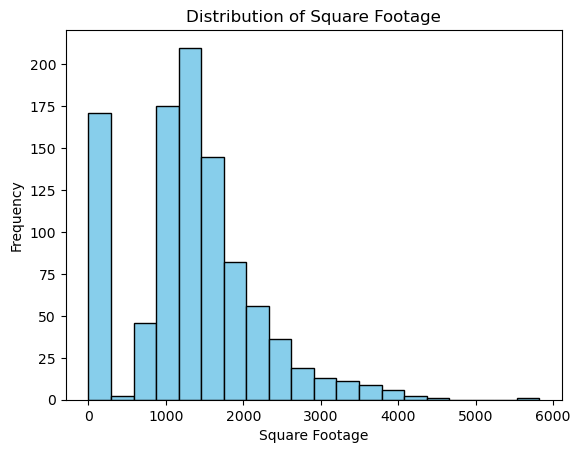

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

plt.hist(df['sq__ft'], bins=20, color="skyblue", edgecolor='black')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage')

Text(0.5, 1.0, 'Distribution of Latitude')

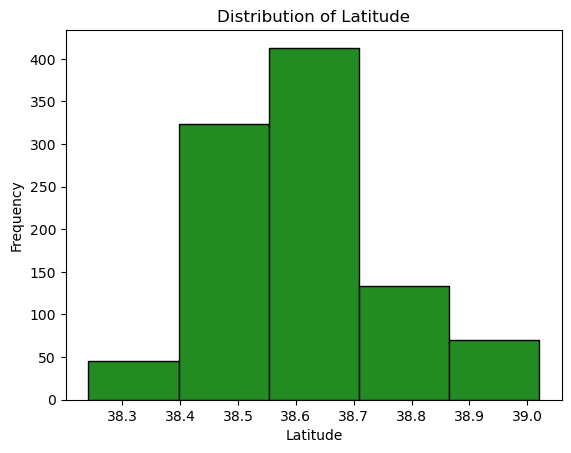

In [18]:
plt.hist(df['latitude'], bins=5, color="forestgreen", edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Distribution of Latitude')

Text(0.5, 1.0, 'Distribution of Longitude')

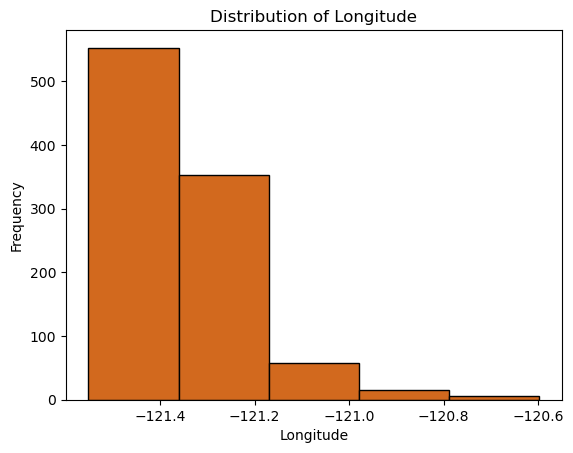

In [19]:
plt.hist(df['longitude'], bins=5, color="chocolate", edgecolor='black')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Distribution of Longitude')

#### Exploring Categorical Variables

Text(0.5, 1.0, 'The Number of Beds per House')

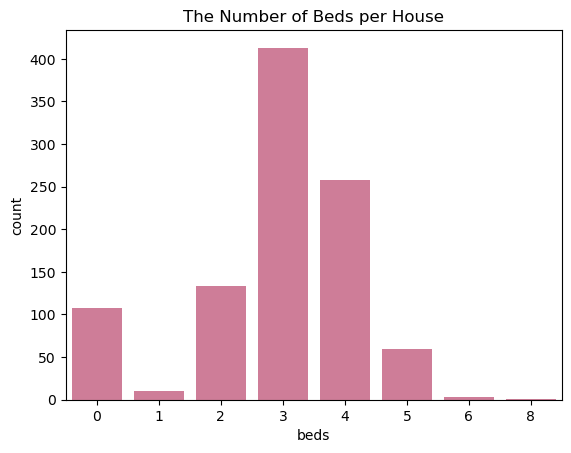

In [84]:
import seaborn as sns
sns.countplot(x="beds", data=df, color="palevioletred")
# sns.countplot(x=df['beds'])
plt.title("The Number of Beds per House")

Text(0.5, 1.0, 'The Number of Baths per House')

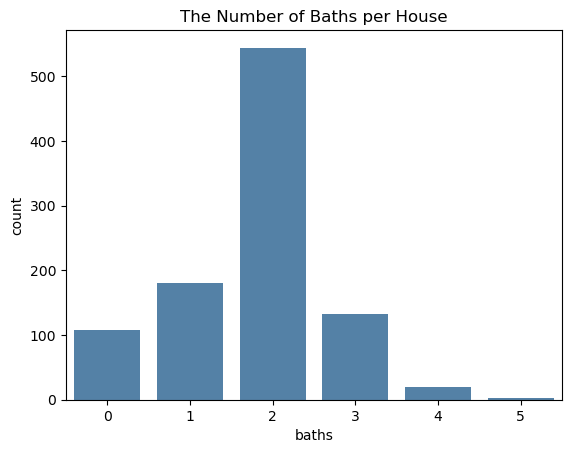

In [22]:
sns.countplot(x="baths", data=df, color='steelblue')
plt.title("The Number of Baths per House")

Text(0.5, 1.0, 'The Number of Homes Under Each House Type')

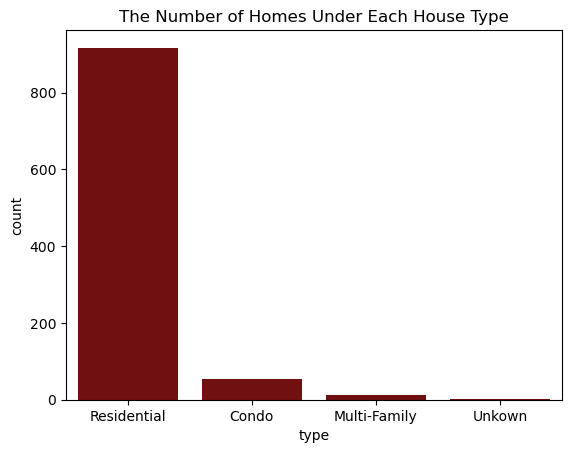

In [23]:
sns.countplot(x="type", data=df, color="maroon")
plt.title("The Number of Homes Under Each House Type") #Come up with a better title

Text(0.5, 1.0, 'The Number of Houses per State')

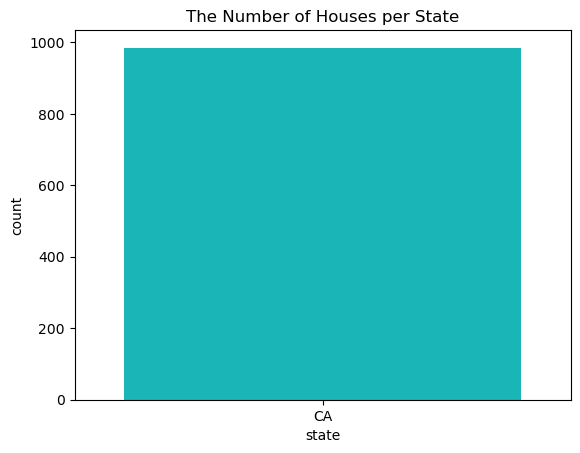

In [24]:
sns.countplot(x="state", data=df, color='darkturquoise')
plt.title("The Number of Houses per State")

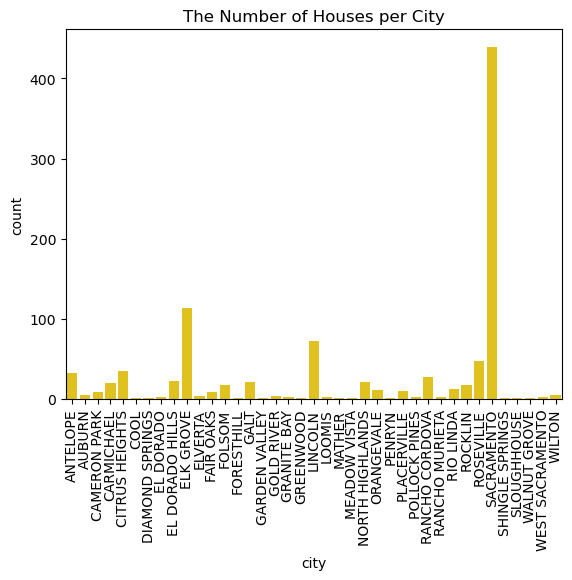

In [25]:
sns.countplot(x="city", data=df, color='gold')
plt.xticks(rotation=90)
plt.title("The Number of Houses per City")
plt.show()

Text(0.5, 1.0, 'The Number of Houses per Zip Code')

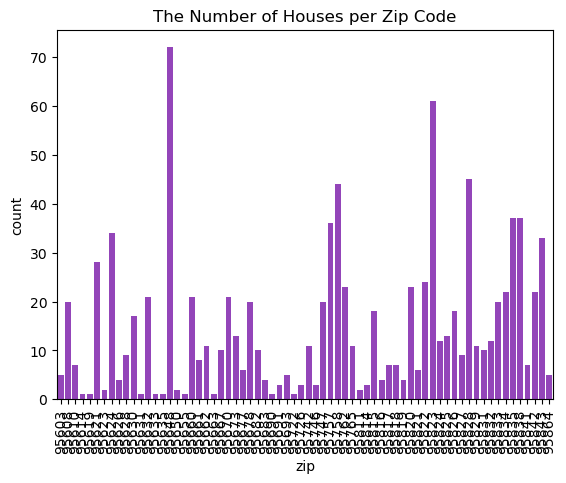

In [26]:
sns.countplot(x="zip", data=df, color='darkorchid')
plt.xticks(rotation=90)
plt.title("The Number of Houses per Zip Code")

**Observations**:
There are 0 values found in both beds and baths. It could be that the 0 values for the beds could be studio apartments, and then for the baths, it could be half baths. That's the only odd thing I can see in these graphs and would need more information on those values and what they mean.

#### Engineering New Variables
Entries with a square footage of 0 are empty lots; as such, it is better to represent these as a boolean variable "empty_lot".

In [29]:
df["empty_lot"] = df["sq__ft"].apply(lambda x: True if x == 0 else False)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False


Text(0.5, 1.0, 'The Number of Empty and Non-empty lots')

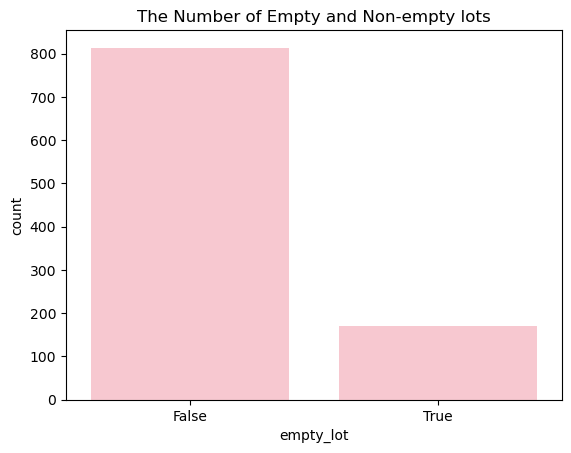

In [30]:
sns.countplot(x="empty_lot", data=df, color='pink')
plt.title("The Number of Empty and Non-empty lots")

In [31]:
df['street'].value_counts()

street
8306 CURLEW CT         2
4734 14TH AVE          2
1223 LAMBERTON CIR     2
7 CRYSTALWOOD CIR      2
3526 HIGH ST           1
                      ..
2981 WRINGER DR        1
8616 ROCKPORTE CT      1
4128 HILL ST           1
1409 47TH ST           1
3882 YELLOWSTONE LN    1
Name: count, Length: 981, dtype: int64

I do not think the street variable is useful for analysis in this current form. As there are too many unique values, it would be difficult to draw any relationships.

In [33]:
df.head(20)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,empty_lot
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,False
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,False
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,False
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,False
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,False
5,5828 PEPPERMILL CT,SACRAMENTO,95841,CA,3,1,1122,Condo,Wed May 21 00:00:00 EDT 2008,89921,38.662595,-121.327813,False
6,6048 OGDEN NASH WAY,SACRAMENTO,95842,CA,3,2,1104,Residential,Wed May 21 00:00:00 EDT 2008,90895,38.681659,-121.351705,False
7,2561 19TH AVE,SACRAMENTO,95820,CA,3,1,1177,Residential,Wed May 21 00:00:00 EDT 2008,91002,38.535092,-121.481367,False
8,11150 TRINITY RIVER DR Unit 114,RANCHO CORDOVA,95670,CA,2,2,941,Condo,Wed May 21 00:00:00 EDT 2008,94905,38.621188,-121.270555,False
9,7325 10TH ST,RIO LINDA,95673,CA,3,2,1146,Residential,Wed May 21 00:00:00 EDT 2008,98937,38.700909,-121.442979,False


There is a pattern here with the addresses; there are avenues, drives, ways, circles, streets, roads, and courts. These would be better than the whole address because they can allow us to draw relationships and comparisons between street types rather than the full address.

In [35]:
# Function get_street_type(address) will return the street type of the respective addresses, e.g. AVE, ST, WAY
def get_street_type(address):
   import re
   pattern = r'[0-9]'
   line = re.sub(pattern, "",address)
   if "Unit" in address:
       i = line.find("Unit")
       before = line[:i]
       street_type = list(filter(None,before.split(" ")))[-1]
   else:
       street_type = list(filter(None,line.split(" ")))[-1]
   return street_type 

In [59]:
# Applying the function to extract the street types from the addresses
df["street_types"] = df['street'].apply(get_street_type)

In [65]:
# Printing out the count of the unique street types 
st_type = df['street_types'].value_counts()
print(st_type)

street_types
WAY         303
DR          171
CT          126
CIR         113
ST           82
AVE          74
LN           47
RD           28
BLVD         13
PL           10
PKWY          7
WALK          1
HL            1
TRL           1
MARTINA       1
TRAK          1
CONEJO        1
GRANDE        1
BROADWAY      1
LOOP          1
HIGHWAY       1
MADERA        1
Name: count, dtype: int64


In [79]:
# Checking some the rows that do not have proper street types to ensure the address was parsed correctly and the street type was not cut off or missed
filtered_rows1 = df.query("street_types == 'GRANDE'")
filtered_rows2 = df.query("street_types == 'BROADWAY'")
print(filtered_rows1)
print(filtered_rows2)

              street        city    zip state beds baths  sq__ft         type  \
374  3128 VIA GRANDE  SACRAMENTO  95825    CA    2     1     972  Residential   

                        sale_date   price   latitude  longitude  empty_lot  \
374  Mon May 19 00:00:00 EDT 2008  125000  38.598321 -121.39161      False   

    street_types  
374       GRANDE  
            street        city    zip state beds baths  sq__ft         type  \
338  4030 BROADWAY  SACRAMENTO  95817    CA    2     1     623  Residential   

                        sale_date  price   latitude   longitude  empty_lot  \
338  Mon May 19 00:00:00 EDT 2008  62050  38.546798 -121.460038      False   

    street_types  
338     BROADWAY  


Some values i.e.(MARTINA, CONEJO, BROADWAY, MADERA, GRANDE), do not describe street types. These rows will be dropped as they do not have any address steet type and are only one row each. i.e. not repeated values

In [92]:
# Removing the rows with the specified street names
df = df[df["street_types"] != "MARTINA"]
df = df[df["street_types"] != "CONEJO"]
df = df[df["street_types"] != "BROADWAY"]
df = df[df["street_types"] != "MADERA"]
df = df[df["street_types"] != "GRANDE"]

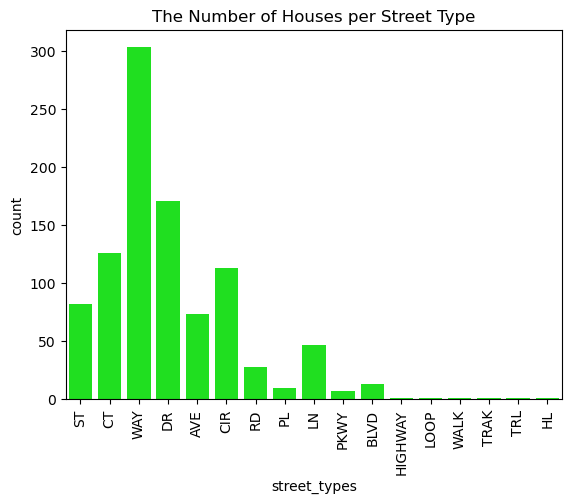

In [94]:
sns.countplot(x="street_types", data=df, color='lime')
plt.xticks(rotation=90)
plt.title("The Number of Houses per Street Type")
plt.show()

#### Identifying Potential Label Variables

House prices make a good label/target variable (output) for a ***regression problem***. We can predict house prices by looking at other input variables like the square footage, number of bedrooms, or city.
The house type would make a good label (output) for a ***classification problem***. We can use variables like location, price, or beds to determine the type of property a house is.


#### Removing Outlier Records
The type variable has an unknown entry.  

In [123]:
# Removing the rows with the unknown variable entry
df.drop(df[df['type'] == 'Unkown'].index, inplace=True)

In [125]:
# Saving the cleaned data set as a CSV file
df.to_csv('Sacramentorealestatecleaned_data.csv', index=False)